# 模組 1.2: 資料視覺化基礎

## 學習目標
- 了解資料視覺化在 EDA 中的重要性
- 學習使用 Matplotlib 和 Seaborn 繪製基本圖表
- 掌握如何根據分析目標選擇合適的圖表類型
- 能夠視覺化單變數分佈與雙變數關係

## 導論：為何視覺化至關重要？

在您的指南《駕馭未知》中提到：「*EDA 的目標是培養對資料的『感覺』和理解*」。純粹的數字和統計摘要（如平均值、標準差）有時會隱藏資料的真實樣貌。資料視覺化是將抽象數據轉化為直觀圖形的過程，能幫助我們快速發現模式、識別異常值、理解變數分佈和探索變數之間的關係。Seaborn 是基於 Matplotlib 的進階繪圖函式庫，提供了更美觀、更簡潔的語法來創建複雜的統計圖表。

在本筆記本中，我們將學習如何使用這些工具來「看見」我們的資料。

In [11]:
# 導入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 設定視覺化風格
# 'seaborn-v0_8-whitegrid' 提供了帶有白色網格的 seaborn 預設風格，更易於讀取
plt.style.use('seaborn-v0_8-whitegrid')
# 設置中文字體，以防圖表標題或標籤出現亂碼
# 請確保您的環境中已安裝 'Microsoft JhengHei' 或其他中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題
print("Matplotlib and Seaborn styles configured.")

# 忽略不必要的警告訊息
import warnings
warnings.filterwarnings('ignore')



Matplotlib and Seaborn styles configured.


In [12]:
# 再次載入 Titanic 資料集
path = r'..\..\..\..\datasets\raw\titanic\train.csv'
titanic_df = pd.DataFrame()
try:
    titanic_df = pd.read_csv(path)
    print("成功載入 Titanic 資料集!")
except FileNotFoundError:
    print(f"在 '{path}' 找不到 train.csv。")



成功載入 Titanic 資料集!


## 1. 視覺化單變數分佈 (Univariate Analysis)

單變數分析專注於單獨理解每一個變數的特性。

### 1.1 數值型變數

對於數值型變數，我們關心它的集中趨勢、分佈形狀（是否對稱、偏斜）和離散程度。

**直方圖 (Histogram)** 和 **核密度估計圖 (KDE Plot)** 是最常用的工具。

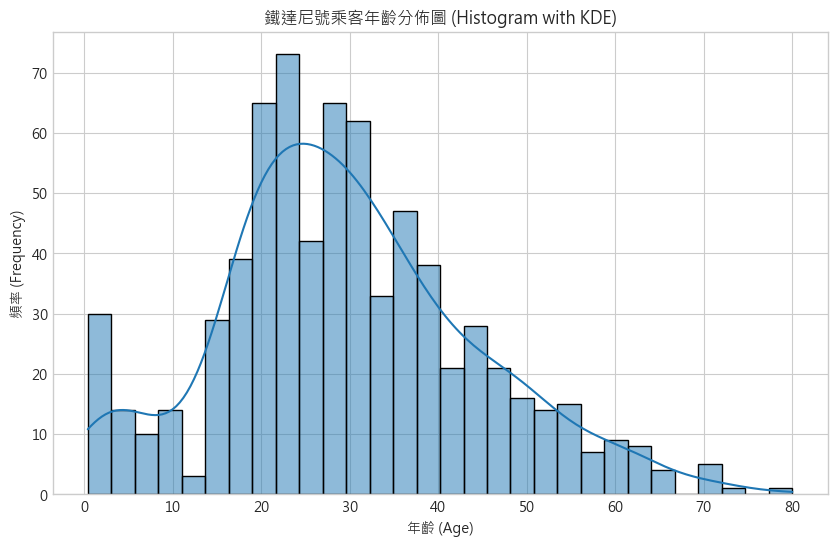

In [13]:
# 使用 Seaborn 繪製 'Age' 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'].dropna(), kde=True, bins=30) # dropna() 忽略缺失值
plt.title('鐵達尼號乘客年齡分佈圖 (Histogram with KDE)')
plt.xlabel('年齡 (Age)')
plt.ylabel('頻率 (Frequency)')
plt.show()



從上圖可以看出，乘客年齡主要集中在 20-40 歲之間，呈現一個輕微的右偏分佈。KDE 曲線則提供了分佈的平滑估計。

**箱型圖 (Box Plot)** 提供了另一種視角，專注於顯示數據的四分位數、中位數和異常值。

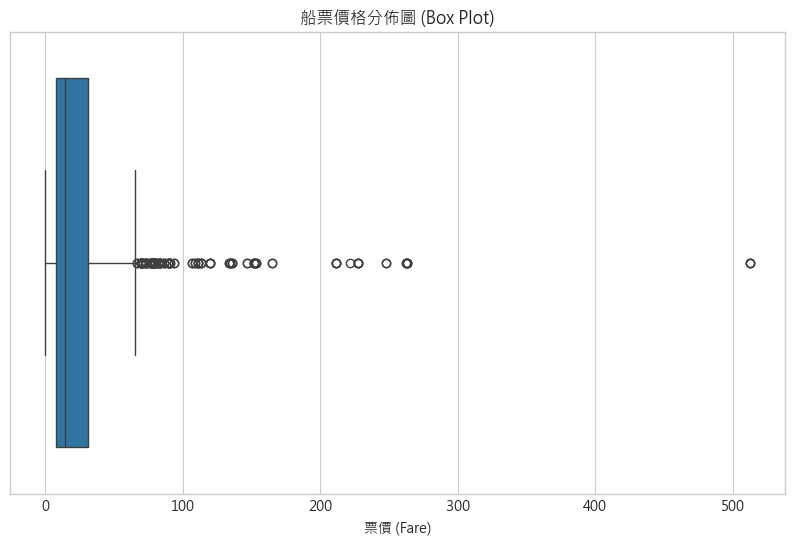

In [14]:
# 使用 Seaborn 繪製 'Fare' 的箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(x=titanic_df['Fare'])
plt.title('船票價格分佈圖 (Box Plot)')
plt.xlabel('票價 (Fare)')
plt.show()



`Fare` 的箱型圖顯示，大部分票價都集中在一個較低的範圍內，但存在大量票價非常高的異常值，這也強烈暗示了數據的右偏特性。

### 1.2 類別型變數

對於類別型變數，我們主要關心每個類別的頻率。

**計數圖 (Count Plot)** 是最直接的視覺化方法。

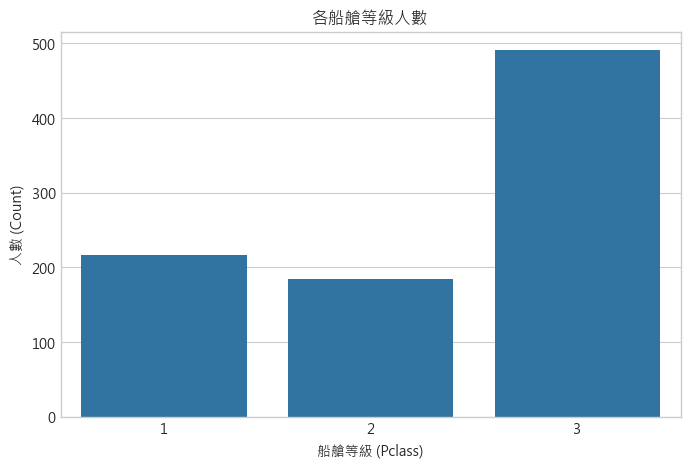

In [15]:
# 使用 Seaborn 繪製 'Pclass' (船艙等級) 的計數圖
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=titanic_df)
plt.title('各船艙等級人數')
plt.xlabel('船艙等級 (Pclass)')
plt.ylabel('人數 (Count)')
plt.show()



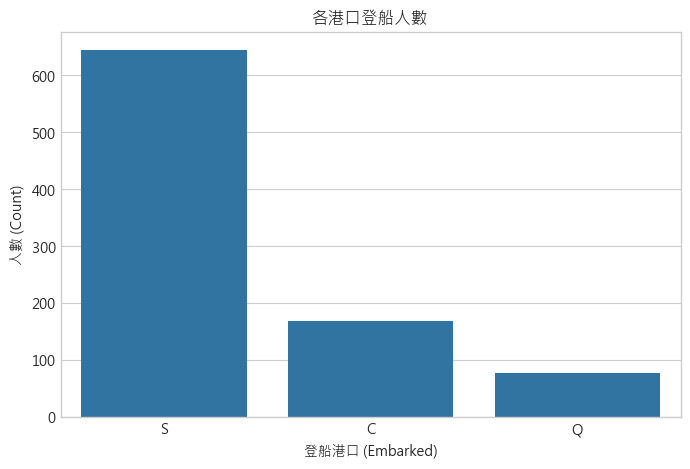

In [16]:
# 使用 Seaborn 繪製 'Embarked' (登船港口) 的計數圖
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=titanic_df)
plt.title('各港口登船人數')
plt.xlabel('登船港口 (Embarked)')
plt.ylabel('人數 (Count)')
plt.show()



上圖清晰地顯示了三等艙的乘客數量最多，以及從 S 港口（Southampton）登船的乘客遠超其他港口。

## 2. 視覺化雙變數關係 (Bivariate Analysis)

雙變數分析旨在探索兩個變數之間的關聯。

### 2.1 數值型 vs. 數值型

**散點圖 (Scatter Plot)** 是觀察兩個數值變數關係的最佳選擇。

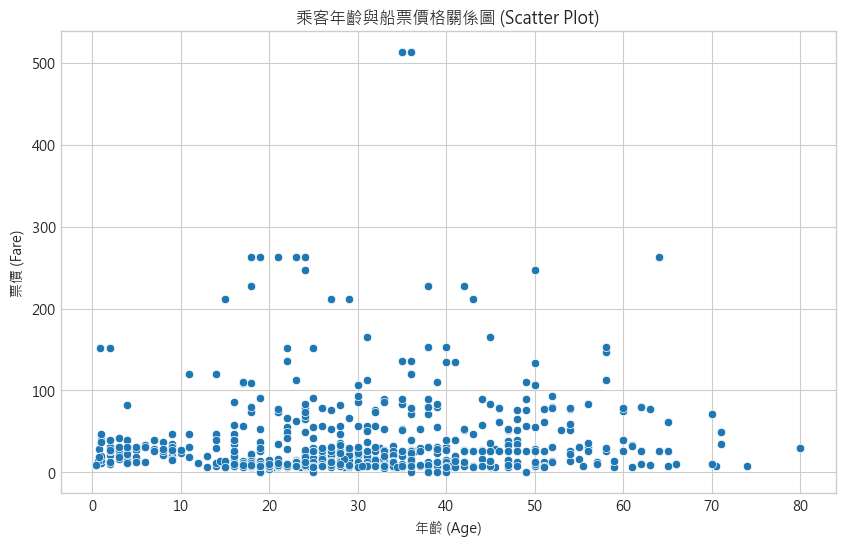

In [17]:
# 'Age' vs 'Fare'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.title('乘客年齡與船票價格關係圖 (Scatter Plot)')
plt.xlabel('年齡 (Age)')
plt.ylabel('票價 (Fare)')
plt.show()



散點圖沒有顯示出年齡和票價之間有強烈的線性關係，但可以看到高票價的乘客似乎分布在各個年齡段。

### 2.2 類別型 vs. 數值型

我們想知道數值變數在不同類別下的分佈情況。**箱型圖 (Box Plot)** 或 **小提琴圖 (Violin Plot)** 非常適合這個場景。

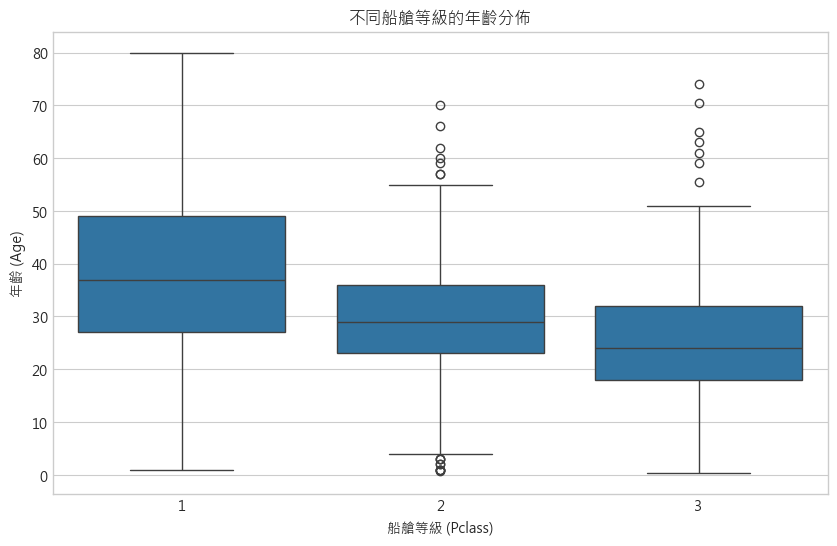

In [18]:
# 'Pclass' vs 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('不同船艙等級的年齡分佈')
plt.xlabel('船艙等級 (Pclass)')
plt.ylabel('年齡 (Age)')
plt.show()



從 `Pclass` 與 `Age` 的箱型圖中，我們可以提出一個有趣的初步假設：頭等艙 (Pclass=1) 的乘客年齡中位數顯著高於二等和三等艙。

**小提琴圖 (Violin Plot)** 結合了箱型圖和核密度估計圖的優點。

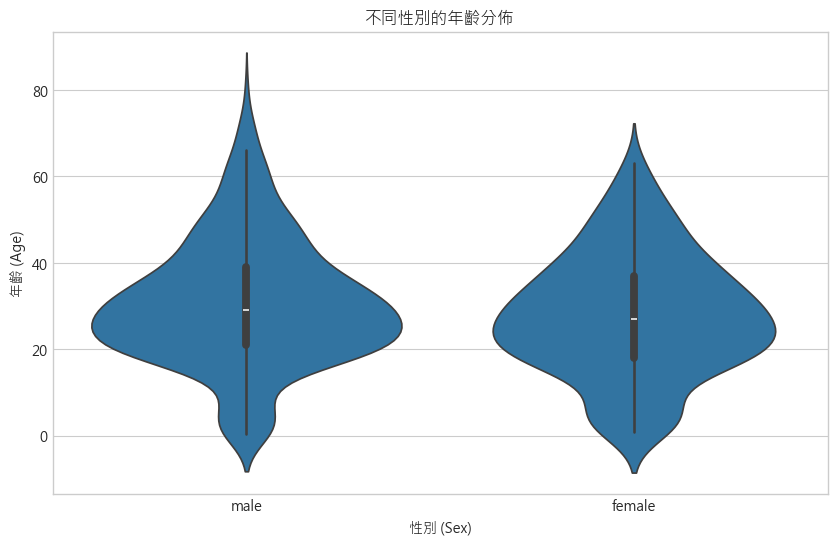

In [19]:
# 'Sex' vs 'Age'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=titanic_df)
plt.title('不同性別的年齡分佈')
plt.xlabel('性別 (Sex)')
plt.ylabel('年齡 (Age)')
plt.show()



### 2.3 類別型 vs. 類別型

要觀察兩個類別變數的關係，我們通常會先計算交叉表，然後用**熱力圖 (Heatmap)** 或 **分組計數圖** 來視覺化。

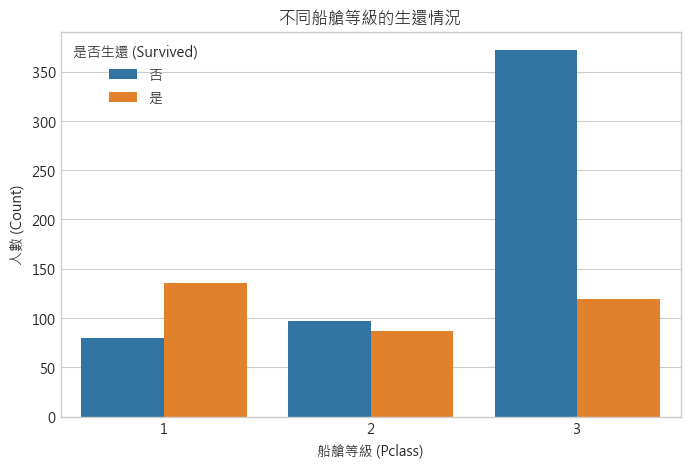

In [20]:
# 'Pclass' vs 'Survived'
# 使用分組計數圖
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('不同船艙等級的生還情況')
plt.xlabel('船艙等級 (Pclass)')
plt.ylabel('人數 (Count)')
plt.legend(title='是否生還 (Survived)', labels=['否', '是'])
plt.show()



上圖揭示了一個非常重要的模式：三等艙的死亡人數遠高於生還人數，而頭等艙的生還比例最高。這是非常強的預測信號。

## 總結

在這個筆記本中，我們學習了如何使用 Matplotlib 和 Seaborn 進行資料視覺化：
- 使用直方圖、KDE 圖和箱型圖來理解**單一數值變數的分佈**。
- 使用計數圖來理解**單一類別變數的頻率**。
- 使用散點圖探索**兩個數值變數的關係**。
- 使用箱型圖或小提琴圖比較**不同類別下的數值分佈**。
- 使用分組計數圖觀察**兩個類別變數的交互關係**。

視覺化是 EDA 的核心，它將引導我們進行後續的特徵工程和模型建立。在下一個筆記本中，我們將把所有技巧結合起來，進行一次完整的 EDA 演練。